In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#load the image
image=cv2.imread(r"C:\Users\RISHIKA REDDY\Downloads\img-enhance.png")
if image is None:
    print("Error:Image not found.check the path")
    exit()
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#convert the image to grayscale for histogram equilization
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [12]:
#histogram equilization

hist_eq=cv2.equalizeHist(gray)


In [13]:
#contrast Stretching

def contrast_stretch(img):
    min_val=np.min(img)
    max_val=np.max(img)
    stretched=(img-min_val)*(255.0/(max_val-min_val))
    return np.uint8(stretched)

contrast_stretched=contrast_stretch(gray)


In [14]:
## unsharp Masking(sharpening)

gaussian_blur=cv2.GaussianBlur(image,(5,5),10.0)
sharp_img=cv2.addWeighted(image,1.5,gaussian_blur,-0.5,0)
sharp_img=cv2.convertScaleAbs(sharp_img)



In [15]:
##gamma Correction
def gamma_correction(img,gamma):
    inv_gamma=1.0/gamma
    table=np.array([(i/255.0)**inv_gamma*255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img,table)

gamma_corrected=gamma_correction(image,1.5)



(-0.5, 1023.5, 1023.5, -0.5)

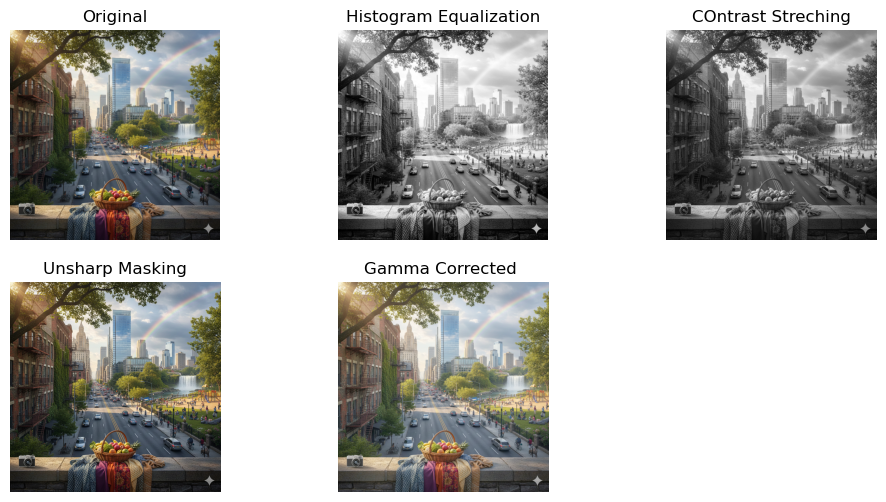

In [16]:
#plot the results
plt.figure(figsize=(12,6))

#original
plt.subplot(2,3,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

#histogram
plt.subplot(2,3,2)
plt.imshow(hist_eq,cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

#contrast stretched
plt.subplot(2,3,3)
plt.imshow(contrast_stretched,cmap="gray")
plt.title("COntrast Streching")
plt.axis("off") 

#unsharpened
plt.subplot(2,3,4)
plt.imshow(sharp_img)
plt.title("Unsharp Masking")
plt.axis("off")

#gamma corrected
plt.subplot(2,3,5)
plt.imshow(gamma_corrected)
plt.title("Gamma Corrected ")
plt.axis("off")
